<a href="https://colab.research.google.com/github/volpo/PG_YELP_GOOGLE_MAPS/blob/main/EDANevada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Datos
# Se extrae directamente desde un archivo en la carpeta de drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Nevada

## Load reviews

In [5]:
import os

folder_path = '/content/drive/MyDrive/YELP & GOOGLE MAPS - REVIEWS AND RECOMMENDATIONS/Google Maps/review-Nevada/'
reviews = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        dfaux = pd.read_json(file_path, lines=True)
        reviews = pd.concat([reviews, dfaux], ignore_index=True)

In [6]:
reviews.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.028432e+20,CDL CO,1622740504476,5,No frills smaller coffee counter in the corner...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x80c8c5cdced316b5:0xaf1ea0b1e42132a9
1,1.149544e+20,So_ Blind,1573159413820,1,Save yourself the frustration and just ignore ...,None,None,0x80c8c5cdced316b5:0xaf1ea0b1e42132a9
2,1.165234e+20,Greg Hansen,1515251163362,3,I passed two Starbucks in order to get to this...,None,None,0x80c8c5cdced316b5:0xaf1ea0b1e42132a9
3,1.033041e+20,Brett Powell,1506206762095,3,It does the job and is my preference over the ...,None,None,0x80c8c5cdced316b5:0xaf1ea0b1e42132a9
4,1.141624e+20,M Aris,1468298771892,3,None,None,None,0x80c8c5cdced316b5:0xaf1ea0b1e42132a9


In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800000 entries, 0 to 1799999
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text     object 
 5   pics     object 
 6   resp     object 
 7   gmap_id  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 109.9+ MB


In [8]:
reviews.describe()

,user_id,time,rating
count,1.800000e+06,1.800000e+06,1.800000e+06
mean,1.092471e+20,1.555020e+12,4.271300e+00
std,5.306079e+18,4.094408e+10,1.133560e+00
min,1.000000e+20,1.055462e+12,1.000000e+00
25%,1.046612e+20,1.528965e+12,4.000000e+00
50%,1.092523e+20,1.557860e+12,5.000000e+00
75%,1.138209e+20,1.582590e+12,5.000000e+00
max,1.184467e+20,1.631009e+12,5.000000e+00


In [9]:
# Time to date
reviews['time'] = pd.to_datetime(reviews['time'], unit='ms')

In [10]:
reviews['year'] = reviews['time'].dt.strftime('%Y').astype(int)

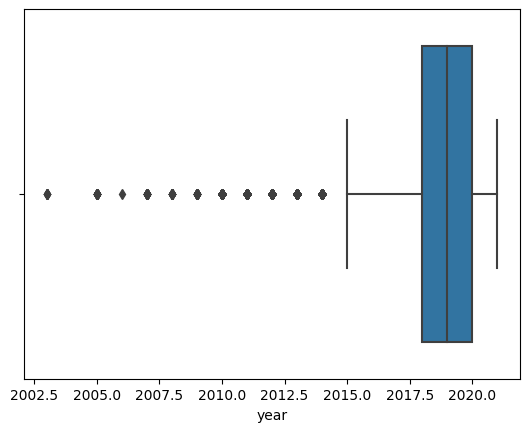

In [11]:
# Outliers in 'year'
sns.boxplot(x='year', data = reviews)
plt.show()

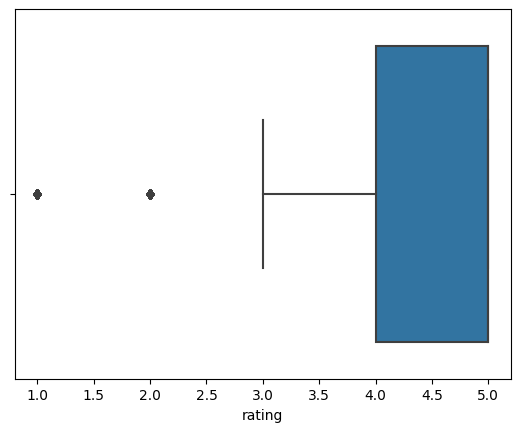

In [12]:
# Outliers in 'rating'
sns.boxplot(x='rating', data = reviews)
plt.show()

## Load MetaData Sitios

In [13]:
folder_path = '/content/drive/MyDrive/YELP & GOOGLE MAPS - REVIEWS AND RECOMMENDATIONS/Google Maps/metadata-sitios/'
data_sitios = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        dfaux = pd.read_json(file_path, lines=True)
        data_sitios = pd.concat([data_sitios, dfaux], ignore_index=True)

In [14]:
data_sitios.head(3)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,Glik's,"Glik's, 1405 W Main St, Gaylord, MI 49735",0x4d354f7b3ae7bef1:0x8d9fdcd2fd71eb10,Family-owned clothing chain offering trendy ca...,45.025578,-84.702644,"[Clothing store, Shoe store, Women's clothing ...",4.4,16,None,"[[Saturday, 10AM–8PM], [Sunday, 12–5PM], [Mond...","{'Service options': ['In-store pickup', 'In-st...",Open ⋅ Closes 8PM,"[0x4d3545876def64d9:0x9ce5f21fc27974d6, 0x4d35...",https://www.google.com/maps/place//data=!4m2!3...
2,Oscoda County Area Transit Authority (O-cats),"Oscoda County Area Transit Authority (O-cats),...",0x88208ef3441c45bb:0x8dd64d99a31de703,None,44.645621,-84.149766,[Handicapped transportation service],4.7,6,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x88208ef38622eed1:0xc6f564f43dcbeb30, 0x8820...",https://www.google.com/maps/place//data=!4m2!3...


In [15]:
data_sitios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925007 entries, 0 to 1925006
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   name              object 
 1   address           object 
 2   gmap_id           object 
 3   description       object 
 4   latitude          float64
 5   longitude         float64
 6   category          object 
 7   avg_rating        float64
 8   num_of_reviews    int64  
 9   price             object 
 10  hours             object 
 11  MISC              object 
 12  state             object 
 13  relative_results  object 
 14  url               object 
dtypes: float64(3), int64(1), object(11)
memory usage: 220.3+ MB


In [16]:
data_sitios.describe()

,latitude,longitude,avg_rating,num_of_reviews
count,1.925007e+06,1.925007e+06,1.925007e+06,1.925007e+06
mean,3.743198e+01,-9.233173e+01,4.304134e+00,3.918857e+01
std,5.431630e+00,1.635767e+01,7.111445e-01,8.199733e+01
min,-1.176378e+01,-1.788071e+02,1.000000e+00,1.000000e+00
25%,3.370828e+01,-9.914652e+01,4.000000e+00,7.000000e+00
50%,3.827585e+01,-8.757343e+01,4.500000e+00,1.800000e+01
75%,4.129210e+01,-8.028819e+01,4.800000e+00,4.400000e+01
max,8.785652e+01,1.800000e+02,5.000000e+00,9.728000e+03


Filtrar por categorias:

In [17]:
category = data_sitios['category'].astype(str).str.replace(", ", ',')
category = category.astype(str).str.replace("'", '')
category = category.astype(str).str.replace('"', '')
category = category.astype(str).str.replace("[", '')
category = category.astype(str).str.replace("]", '')

In [18]:
category = category.str.split(',').explode('category').dropna().reset_index(drop=True)
category.unique()

array(['Pharmacy', 'Clothing store', 'Shoe store', ..., 'Fault',
       'Pueblan restaurant', 'Waste container'], dtype=object)

In [19]:
#Cantidad de categorias unicas:
len(category.unique())

4367

In [20]:
# Obtener los valores únicos y sus frecuencias
valores, frecuencias = np.unique(category, return_counts=True)

indices_ordenados = np.argsort(frecuencias)[::-1]

print("Los valores más repetidos son:")
for i in indices_ordenados[:20]:
    print(valores[i], "se repite", frecuencias[i], "veces")

Los valores más repetidos son:
Restaurant se repite 60662 veces
Auto repair shop se repite 49757 veces
Gas station se repite 44996 veces
Service establishment se repite 43134 veces
Beauty salon se repite 42048 veces
Convenience store se repite 40051 veces
Church se repite 33790 veces
Hair salon se repite 33261 veces
Nail salon se repite 28523 veces
ATM se repite 27083 veces
Park se repite 26959 veces
Doctor se repite 23243 veces
Clothing store se repite 23120 veces
Dentist se repite 22967 veces
Insurance agency se repite 22774 veces
Barber shop se repite 22595 veces
Grocery store se repite 20007 veces
Cell phone store se repite 19657 veces
Bar se repite 19402 veces
Tire shop se repite 19167 veces


In [21]:
#Borramos valores nulos de la columna 'Category'
data_sitios = data_sitios.dropna(subset=['category'])

In [22]:
category_gastronomy = ['food', 'restaurant', 'cafe', 'bar', 'pub', 'bakery']

is_gastronomic = []
for categories in data_sitios['category']:
    found_tag = False
    for tag in categories:
        if tag.lower() in category_gastronomy:
            found_tag = True
            break
    is_gastronomic.append(found_tag)

# Filter the DataFrame based on this condition
data_gastronomy = data_sitios[is_gastronomic]

In [23]:
data_gastronomy.head(3)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
35,Grill House,"Grill House, 300 N Craig St, Pittsburgh, PA 15213",0x8834f31867ab2d1d:0x24fb4ba41dbb0c2f,None,40.451890,-79.952022,[Restaurant],3.2,8,None,None,{'Amenities': ['Good for kids']},None,None,https://www.google.com/maps/place//data=!4m2!3...
60,Flambe',"Flambe', 9007 Avenue A, Brooklyn, NY 11236",0x89c25dcddcd0c17f:0x8f96868c994c2f6c,None,40.651471,-73.918052,[Restaurant],4.0,28,None,"[[Saturday, 10AM–10PM], [Sunday, 10AM–10PM], [...","{'Service options': ['Curbside pickup', 'No-co...",Open ⋅ Closes 10PM,None,https://www.google.com/maps/place//data=!4m2!3...
66,Mc Donald's on church ave,"Mc Donald's on church ave, 5707 Church Ave, Br...",0x89c25dfd09254763:0x5865f6a767160b76,None,40.652666,-73.923211,[Restaurant],2.0,4,None,None,"{'Service options': ['Curbside pickup', 'Deliv...",None,None,https://www.google.com/maps/place//data=!4m2!3...


In [24]:
data_gastronomy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98568 entries, 35 to 1924988
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              98568 non-null  object 
 1   address           98146 non-null  object 
 2   gmap_id           98568 non-null  object 
 3   description       29067 non-null  object 
 4   latitude          98568 non-null  float64
 5   longitude         98568 non-null  float64
 6   category          98568 non-null  object 
 7   avg_rating        98568 non-null  float64
 8   num_of_reviews    98568 non-null  int64  
 9   price             42860 non-null  object 
 10  hours             85135 non-null  object 
 11  MISC              97627 non-null  object 
 12  state             85718 non-null  object 
 13  relative_results  80024 non-null  object 
 14  url               98568 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 12.0+ MB


Filtrar por estado

In [25]:
# Get the gmaps_ids of all unique shops in the reviews
Nevada_gmap = reviews['gmap_id'].unique()
Nevada_gmap

array(['0x80c8c5cdced316b5:0xaf1ea0b1e42132a9',
       '0x80c8ea3f06df9711:0x7f90d1ab2b251c5',
       '0x80c8e9c312d2a0b9:0xa01533888ebef0d', ...,
       '0x80c8e81f982bea5b:0x48d47978e9554c42',
       '0x80c8e81f77d6da1b:0x8e6bf59ea762a10b',
       '0x80c8c0f058569c15:0x444a4c1dd5f9f039'], dtype=object)

In [26]:
# Filter the DataFrame based on Nevada's ids
data_gastronomy_n =  data_gastronomy[data_gastronomy['gmap_id'].isin(Nevada_gmap)]

In [27]:
data_gastronomy_n.head(3)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
22325,Taste My Love Cafe,"Taste My Love Cafe, 3231 N Decatur Blvd, Las V...",0x80c8ea0a3f8750df:0xb53a27b3b0bd57fe,None,36.218888,-115.208276,[Restaurant],4.5,18,None,"[[Friday, 9AM–7PM], [Saturday, 9AM–7PM], [Sund...","{'Service options': ['Takeout', 'Dine-in', 'De...",Closed ⋅ Opens 9AM Sat,"[0x80c8ea0a1a6481c3:0xc39867121955d481, 0x80c8...",https://www.google.com/maps/place//data=!4m2!3...
34005,Packs & Pints,"Packs & Pints, 944 Victorian Ave, Sparks, NV 8...",0x80993f950a3ae051:0x982b3865ffbcbf9f,None,39.535143,-119.755308,[Bar],4.6,18,None,"[[Friday, 12PM–2AM], [Saturday, 12PM–2AM], [Su...","{'Service options': ['Dine-in', 'Delivery'], '...",Closed ⋅ Opens 12PM,None,https://www.google.com/maps/place//data=!4m2!3...
34820,Austin Owl Club,"Austin Owl Club, 86 Main St, Austin, NV 89310",0x80a4a4087bd25111:0x218a1d3b8fa179f3,None,39.492921,-117.071811,"[Bar, Cocktail bar]",4.0,26,None,None,"{'Service options': ['Takeout', 'Dine-in', 'De...",None,"[0x80a4a4087bd25111:0x1a22c3b2d1ccc290, 0x80a4...",https://www.google.com/maps/place//data=!4m2!3...


In [28]:
data_gastronomy_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 22325 to 1924868
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              533 non-null    object 
 1   address           533 non-null    object 
 2   gmap_id           533 non-null    object 
 3   description       206 non-null    object 
 4   latitude          533 non-null    float64
 5   longitude         533 non-null    float64
 6   category          533 non-null    object 
 7   avg_rating        533 non-null    float64
 8   num_of_reviews    533 non-null    int64  
 9   price             290 non-null    object 
 10  hours             500 non-null    object 
 11  MISC              528 non-null    object 
 12  state             501 non-null    object 
 13  relative_results  457 non-null    object 
 14  url               533 non-null    object 
dtypes: float64(3), int64(1), object(11)
memory usage: 66.6+ KB


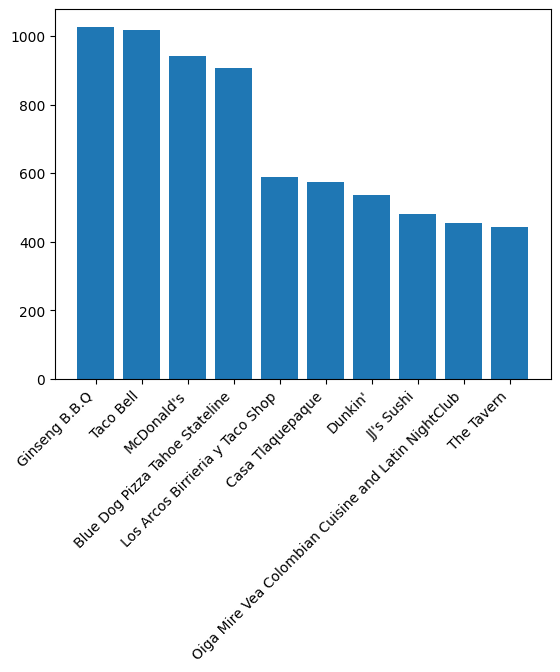

In [29]:
#Sitios con mayor cantidad de reviews
data_gastronomy_n_top10 = data_gastronomy_n.sort_values(by='num_of_reviews', ascending=False).head(10)

plt.bar(data_gastronomy_n_top10['name'], data_gastronomy_n_top10['num_of_reviews'])

plt.xticks(rotation=45, ha='right')

plt.show()

In [30]:
data_gastronomy_n_top10[['avg_rating', 'name', 'category']]

,avg_rating,name,category
1248912,3.8,Ginseng B.B.Q,"[Korean restaurant, Restaurant]"
1345945,4.0,Taco Bell,"[Fast food restaurant, Breakfast restaurant, B..."
1372012,2.9,McDonald's,"[Fast food restaurant, Breakfast restaurant, C..."
1331480,4.1,Blue Dog Pizza Tahoe Stateline,[Restaurant]
1363721,4.6,Los Arcos Birrieria y Taco Shop,"[Mexican restaurant, Restaurant]"
1345950,4.1,Casa Tlaquepaque,"[Mexican restaurant, Restaurant]"
1254224,3.6,Dunkin',"[Coffee shop, Bagel shop, Bakery, Breakfast re..."
1611760,4.6,JJ's Sushi,"[Sushi restaurant, Japanese restaurant, Restau..."
1687319,4.2,Oiga Mire Vea Colombian Cuisine and Latin Nigh...,"[Colombian restaurant, Night club, Restaurant]"
1596252,4.5,The Tavern,"[Bar, Bar & grill]"


Se observa que los negocios Ginseng B.B.Q, McDonald's	y Dunkin', a pesar de ser los que mas reviews tienen, su puntacion es baja tomando en cuenta que la mayoria de los negicios tienen entre 4 y 5 de rating



In [31]:
category_gastronomy = data_gastronomy_n['category'].astype(str).str.replace(", ", ',')
category_gastronomy = category_gastronomy.astype(str).str.replace("'", '')
category_gastronomy = category_gastronomy.astype(str).str.replace('"', '')
category_gastronomy = category_gastronomy.astype(str).str.replace("[", '')
category_gastronomy = category_gastronomy.astype(str).str.replace("]", '')
category_gastronomy = category_gastronomy.str.split(',').explode('category').dropna().reset_index(drop=True)

In [32]:
len(category_gastronomy.unique())

191

In [33]:
# Obtener los valores únicos y sus frecuencias
valoresc, frecuenciasc = np.unique(category_gastronomy, return_counts=True)

indices_ordenados = np.argsort(frecuenciasc)[::-1]
top_20_c = pd.DataFrame(columns=['Valor', 'Frecuencia'])

print("Los valores más repetidos son:")
for i in indices_ordenados[:20]:
    top_20_c = top_20_c.append({'Valor': valoresc[i], 'Frecuencia': frecuenciasc[i]}, ignore_index=True)
    print(valoresc[i], "se repite", frecuenciasc[i], "veces")

Los valores más repetidos son:
Restaurant se repite 305 veces
Bar se repite 158 veces
Cafe se repite 82 veces
Fast food restaurant se repite 71 veces
Sandwich shop se repite 58 veces
Caterer se repite 48 veces
Takeout Restaurant se repite 45 veces
Coffee shop se repite 44 veces
Bakery se repite 40 veces
American restaurant se repite 37 veces
Bar & grill se repite 26 veces
Breakfast restaurant se repite 23 veces
Mexican restaurant se repite 22 veces
Espresso bar se repite 17 veces
Sports bar se repite 16 veces
Pizza restaurant se repite 16 veces
Juice shop se repite 15 veces
Coffee store se repite 15 veces
Chinese restaurant se repite 15 veces
Casino se repite 15 veces


In [34]:
top_20_c['Valor'].unique()

array(['Restaurant', 'Bar', 'Cafe', 'Fast food restaurant',
       'Sandwich shop', 'Caterer', 'Takeout Restaurant', 'Coffee shop',
       'Bakery', 'American restaurant', 'Bar & grill',
       'Breakfast restaurant', 'Mexican restaurant', 'Espresso bar',
       'Sports bar', 'Pizza restaurant', 'Juice shop', 'Coffee store',
       'Chinese restaurant', 'Casino'], dtype=object)

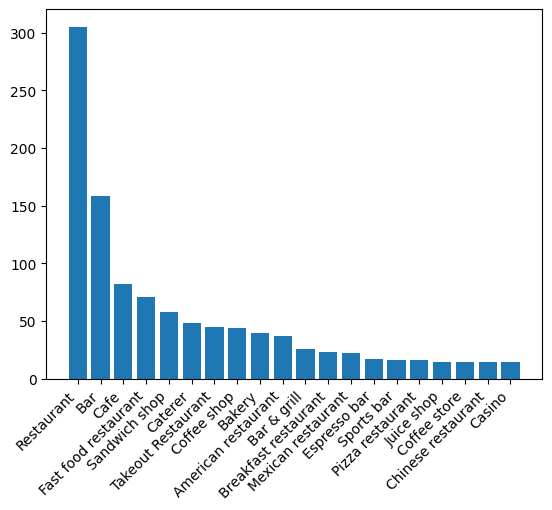

In [35]:
#Categorias mas repetidas entre los establecimientos
plt.bar(top_20_c['Valor'], top_20_c['Frecuencia'])

plt.xticks(rotation=45, ha='right')

plt.show()

Leaving aside the general categories such as: reataurant, bar and cafe.

They stand out: Fast Food, Sandwich shop, Caterer, Takeout reataurant, Bakery and American restaurant.
Being the most repeated categories of establishments in Nevada

In [36]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
# Obtener los valores únicos y sus frecuencias
valoresc, frecuenciasc = np.unique(category_gastronomy, return_counts=True)

indices_ordenados = np.argsort(frecuenciasc)[::1]
menor = pd.DataFrame(columns=['Valor', 'Frecuencia'])

print("Los valores menos repetidos son:")
for i in indices_ordenados[:]:
    if frecuenciasc[i]==1:
      menor = menor.append({'Valor': valoresc[i], 'Frecuencia': frecuenciasc[i]}, ignore_index=True)
      print(valoresc[i], "se repite", frecuenciasc[i], "veces")

Los valores menos repetidos son:
Wine store se repite 1 veces
Massage spa se repite 1 veces
Delivery service se repite 1 veces
Mexican torta restaurant se repite 1 veces
Delivery Chinese restaurant se repite 1 veces
Middle Eastern restaurant se repite 1 veces
Dance restaurant se repite 1 veces
Mobile caterer se repite 1 veces
Modern European restaurant se repite 1 veces
Cuban restaurant se repite 1 veces
Crêperie se repite 1 veces
Neapolitan restaurant se repite 1 veces
Colombian restaurant se repite 1 veces
Coffee wholesaler se repite 1 veces
Organic restaurant se repite 1 veces
Pan-Asian restaurant se repite 1 veces
Pan-Latin restaurant se repite 1 veces
Pasta shop se repite 1 veces
Club se repite 1 veces
Cigar shop se repite 1 veces
Liquor store se repite 1 veces
Eastern European restaurant se repite 1 veces
Eclectic restaurant se repite 1 veces
Karaoke bar se repite 1 veces
Hong Kong style fast food restaurant se repite 1 veces
Hookah bar se repite 1 veces
Golf club se repite 1 vec

In [38]:
data_gastronomy_n.columns

Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url'],
      dtype='object')

In [39]:
data_gastronomy_n['category'] = data_gastronomy_n['category'].astype(str).str.replace(", ", ',')
data_gastronomy_n['category'] = data_gastronomy_n['category'].astype(str).str.replace("'", '')
data_gastronomy_n['category'] = data_gastronomy_n['category'].astype(str).str.replace('"', '')
data_gastronomy_n['category'] = data_gastronomy_n['category'].astype(str).str.replace("[", '')
data_gastronomy_n['category'] = data_gastronomy_n['category'].astype(str).str.replace("]", '')

## Categories sorted by Score and Review

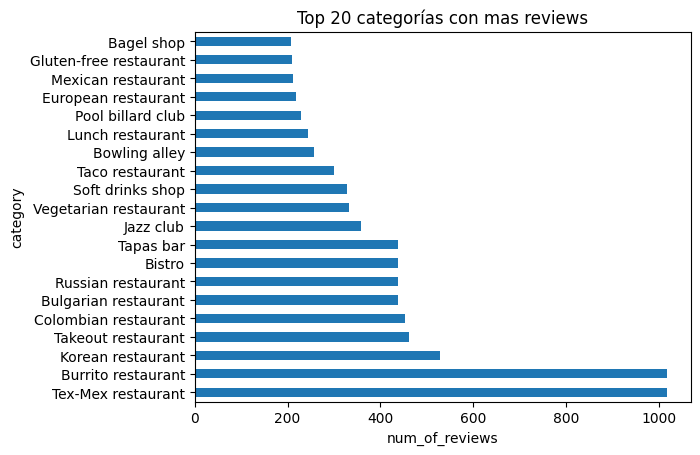

In [40]:
#Mayor promedio de puntaje segun categoria
data = data_gastronomy_n[['category', 'num_of_reviews']]

data['category'] = data_gastronomy_n['category'].str.split(',')
data = data.explode('category').dropna().reset_index(drop=True)

# Calcular el puntaje promedio por género
promedio_por_genero = data.groupby('category')['num_of_reviews'].mean().sort_values(ascending=False)
promedio_por_genero = promedio_por_genero.head(20)


promedio_por_genero.plot(kind='barh', sort_columns=True)

plt.xlabel('num_of_reviews')
plt.ylabel('category')
plt.title('Top 20 categorías con mas reviews')

plt.show()

Highlighting Mexican food

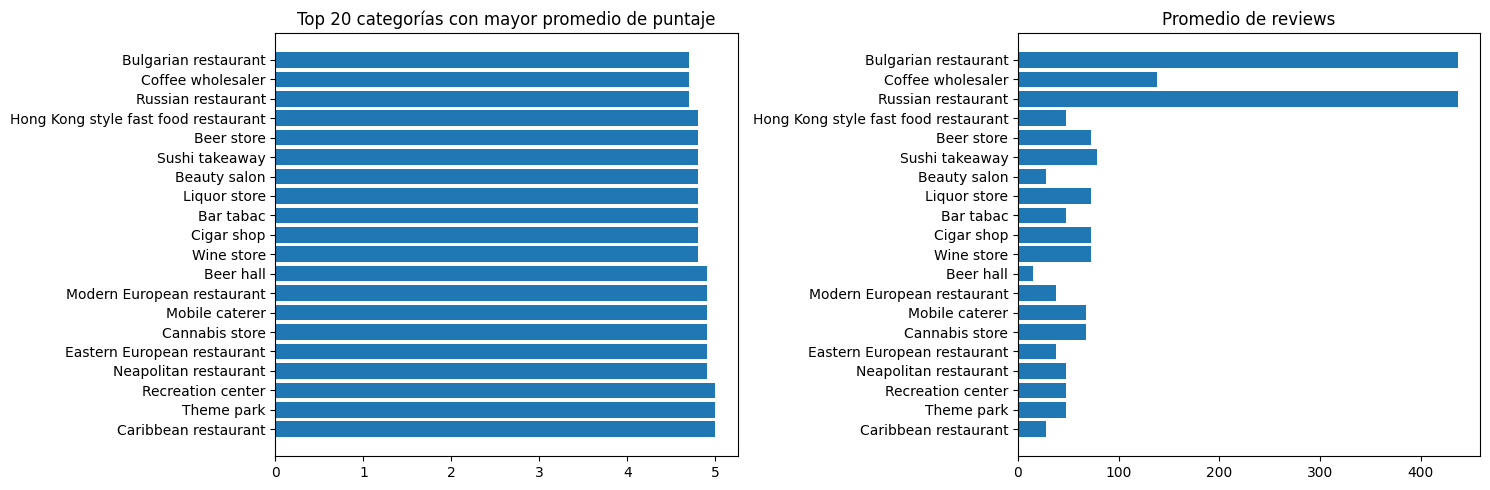

In [41]:
#Mayor promedio de puntaje segun categoria
data = data_gastronomy_n[['category', 'avg_rating', 'num_of_reviews']]

data['category'] = data_gastronomy_n['category'].str.split(',')
data = data.explode('category').dropna().reset_index(drop=True)

promedio_por_genero = data.groupby('category').agg({'avg_rating': 'mean', 'num_of_reviews': 'mean'})
promedio_por_genero = promedio_por_genero.sort_values(by='avg_rating', ascending=False)
promedio_por_genero = promedio_por_genero.head(20)

promedios = promedio_por_genero
# Graficar
fig, axs = plt.subplots(ncols=2, figsize=(15,5))

# Gráfico 1 (avg_rating)
axs[0].barh(promedios['avg_rating'].index, promedios['avg_rating'])
axs[0].set_title('Top 20 categorías con mayor promedio de puntaje')

# Gráfico 2 (num_of_reviews)
axs[1].barh(promedios['num_of_reviews'].index, promedios['num_of_reviews'])
axs[1].set_title('Promedio de reviews')

# Ajustar espaciado
fig.tight_layout()

plt.show()

High rating, many reviews (more than 175):

*   Bulgarian restaurant
*   Russian restaurant

Russian and Bulgarian restaurant

Previously we saw that there is only 1 Bulgarian restaurant and 1 Russian reastaurant in Nevada, excellent rating and quite busy.

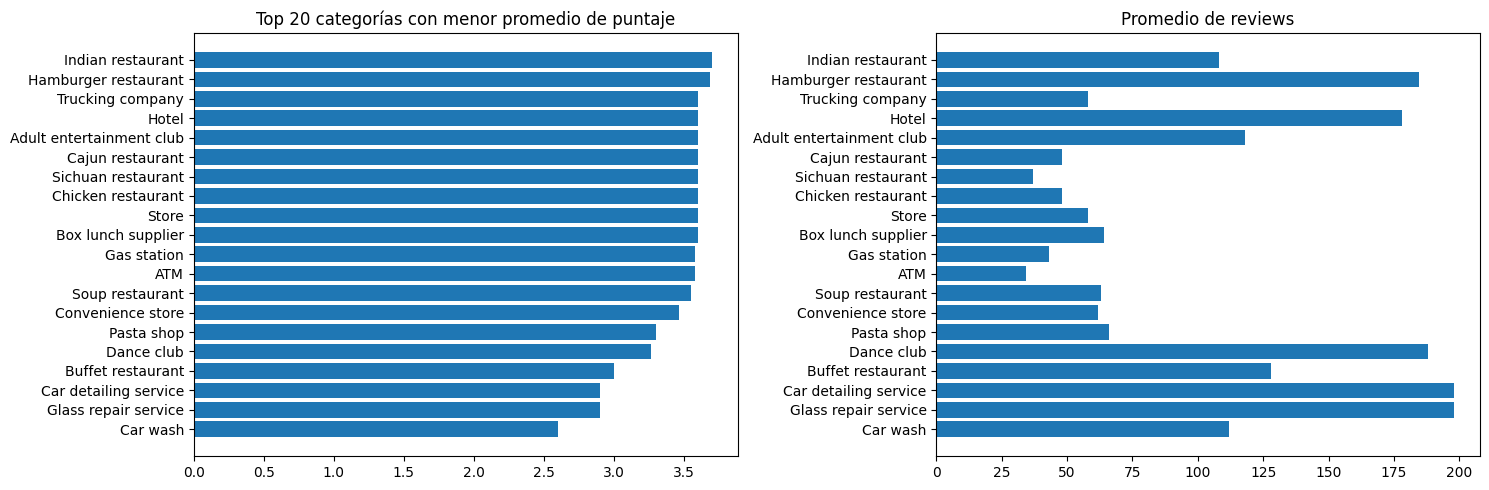

In [42]:
#Menor promedio de puntaje segun categoria
data = data_gastronomy_n[['category', 'avg_rating', 'num_of_reviews']]

data['category'] = data_gastronomy_n['category'].str.split(',')

# Crearmos una nueva columna duplicada para cada genero
data = data.explode('category').dropna().reset_index(drop=True)


promedio_por_genero = data.groupby('category').agg({'avg_rating': 'mean', 'num_of_reviews': 'mean'})
promedio_por_genero = promedio_por_genero.sort_values(by='avg_rating', ascending=True)
promedio_por_genero = promedio_por_genero.head(20)

promedios = promedio_por_genero
# Graficar
fig, axs = plt.subplots(ncols=2, figsize=(15,5))

# Gráfico 1 (avg_rating)
axs[0].barh(promedios['avg_rating'].index, promedios['avg_rating'])
axs[0].set_title('Top 20 categorías con menor promedio de puntaje')

# Gráfico 2 (num_of_reviews)
axs[1].barh(promedios['num_of_reviews'].index, promedios['num_of_reviews'])
axs[1].set_title('Promedio de reviews')

# Ajustar espaciado
fig.tight_layout()

plt.show()

Low rating, many reviews (more than 175):

*   Hamburger restaurant
*   Hotel
*   Dance Club

Low rating, many reviews (more than 100):
*   Indian restaurant
*   Adult entertainment club
*   Buffet restaurant











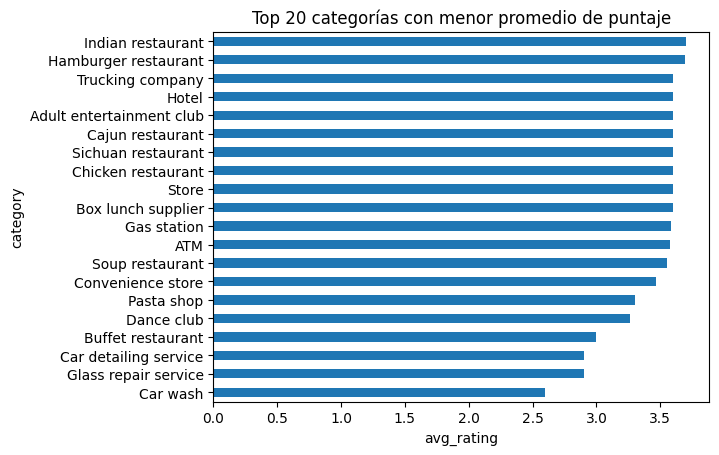

In [43]:
#Menor promedio de puntaje segun categoria
data = data_gastronomy_n[['category', 'avg_rating']]

data['category'] = data_gastronomy_n['category'].str.split(',')

data = data.explode('category').dropna().reset_index(drop=True)

promedio_por_genero = data.groupby('category')['avg_rating'].mean().sort_values(ascending=True)
promedio_por_genero = promedio_por_genero.head(20)

promedio_por_genero.plot(kind='barh', sort_columns=True)

plt.xlabel('avg_rating')
plt.ylabel('category')
plt.title('Top 20 categorías con menor promedio de puntaje')

# Mostrar el gráfico
plt.show()

In [44]:
category_gastronomy

0                   Restaurant
1                          Bar
2                          Bar
3                 Cocktail bar
4                   Restaurant
                 ...          
1531      Fast food restaurant
1532    Gluten-free restaurant
1533       Japanese restaurant
1534                Restaurant
1535                      Cafe
Name: category, Length: 1536, dtype: object

## Moments with more reviews(Days-Months-Years):

In [45]:
data_gastronomy_n ['hours'][:1]

22325    [[Friday, 9AM–7PM], [Saturday, 9AM–7PM], [Sund...
Name: hours, dtype: object

In [46]:
reviews.head(1)

,user_id,name,time,rating,text,pics,resp,gmap_id,year
0,1.028432e+20,CDL CO,2021-06-03 17:15:04.476,5,No frills smaller coffee counter in the corner...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x80c8c5cdced316b5:0xaf1ea0b1e42132a9,2021


In [47]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800000 entries, 0 to 1799999
Data columns (total 9 columns):
 #   Column   Dtype         
---  ------   -----         
 0   user_id  float64       
 1   name     object        
 2   time     datetime64[ns]
 3   rating   int64         
 4   text     object        
 5   pics     object        
 6   resp     object        
 7   gmap_id  object        
 8   year     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 123.6+ MB


In general:

In [48]:
import pandas as pd
import plotly.express as px

reviews['time'] = pd.to_datetime(reviews['time'])

reviews['weekday'] = reviews['time'].dt.strftime('%A')

weekday_counts = reviews['weekday'].value_counts().sort_values(ascending=False)

df_weekday_counts = pd.DataFrame({'weekday': weekday_counts.index, 'count': weekday_counts.values})

# Ordenar los días de la semana en función de la cantidad de reseñas
weekday_order = df_weekday_counts.sort_values('count')['weekday']

# Crear el gráfico de barras
fig = px.bar(df_weekday_counts, x='weekday', y='count', color='count',
             color_continuous_scale='Viridis', title='Cantidad de Reseñas por Día de la Semana',
             category_orders={'weekday': weekday_order})

fig.show()

Saturday and Sunday are the busiest days.

In [49]:
reviews['month'] = reviews['time'].dt.strftime('%B')

month_counts = reviews['month'].value_counts().sort_values(ascending=False)

df_month_counts = pd.DataFrame({'month': month_counts.index, 'count': month_counts.values})

# Ordenar los días de la semana en función de la cantidad de reseñas
month_order = df_month_counts.sort_values('count')['month']

# Crear el gráfico de barras
fig = px.bar(df_month_counts, x='month', y='count', color='count',
             color_continuous_scale='Viridis', title='Cantidad de Reseñas por Mes',
             category_orders={'month': month_order})

fig.show()

The busiest month is January, followed by February and March, followed by July, August and December.

In [50]:
year_counts = reviews['year'].value_counts().sort_values(ascending=False)

df_year_counts = pd.DataFrame({'year': year_counts.index, 'count': year_counts.values})

# Ordenar los días de la semana en función de la cantidad de reseñas
year_order = df_year_counts.sort_values('count')['year']

# Crear el gráfico de barras
fig = px.bar(df_year_counts, x='year', y='count', color='count',
             color_continuous_scale='Viridis', title='Cantidad de Reseñas por Año',
             category_orders={'year': year_order})

fig.show()

The year with the most reviews was 2019, followed by 2018 and 2020.


Taking into consideration the most relevant categories in the previous study, we proceed to analyze the variation over time, in order to detect a trend:

In [77]:
data_gastronomy_n.head(1)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
22325,Taste My Love Cafe,"Taste My Love Cafe, 3231 N Decatur Blvd, Las V...",0x80c8ea0a3f8750df:0xb53a27b3b0bd57fe,None,36.218888,-115.208276,Restaurant,4.5,18,None,"[[Friday, 9AM–7PM], [Saturday, 9AM–7PM], [Sund...","{'Service options': ['Takeout', 'Dine-in', 'De...",Closed ⋅ Opens 9AM Sat,"[0x80c8ea0a1a6481c3:0xc39867121955d481, 0x80c8...",https://www.google.com/maps/place//data=!4m2!3...


In [114]:
category_gastronomy = ['takeout restaurant', 'tex-mex restaurant', 'burrito restaurant', 'taco restaurant',
                       'mexican restaurant', 'korean restaurant', 'colombian restaurant', 'bulgarian restaurant', 'russian restaurant',
                       'bistro', 'tapas bar', 'hamburger restaurant', 'indian restaurant', 'buffet restaurant']

is_gastronomic = []
for categories in data_sitios['category']:
    found_tag = False
    for tag in categories:
        if tag.lower() in category_gastronomy:
            found_tag = True
            break
    is_gastronomic.append(found_tag)

# Filter the DataFrame based on this condition
highlight_categ = data_sitios[is_gastronomic].reset_index(drop=True)

In [115]:
category_gastronomy = ['takeout restaurant', 'tex-mex restaurant', 'burrito restaurant', 'taco restaurant',
                       'mexican restaurant', 'korean restaurant', 'colombian restaurant', 'bulgarian restaurant', 'russian restaurant',
                       'bistro', 'tapas bar', 'hamburger restaurant', 'indian restaurant', 'buffet restaurant']

is_gastronomic = []
gastronomy_categories = []
for categories in highlight_categ['category']:
    found_tag = False
    gastronomy_category = None
    for tag in categories:
        if tag.lower() in category_gastronomy:
            found_tag = True
            gastronomy_category = tag
            break
    is_gastronomic.append(found_tag)
    gastronomy_categories.append(gastronomy_category)

# Add the gastronomy_category column
highlight_categ['gastronomy_category'] = gastronomy_categories

In [116]:
# Get the gmaps_ids of all unique shops in the reviews
Nevada_gmap = reviews['gmap_id'].unique()
Nevada_gmap

# Filter the DataFrame based on Nevada's ids
highlight_categ =  highlight_categ[highlight_categ['gmap_id'].isin(Nevada_gmap)].reset_index(drop=True)

In [117]:
highlight_categ.head(1)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,gastronomy_category
0,Latin Soul Restaurant,"Latin Soul Restaurant, 168 US-50, Stateline, N...",0x80999a85939c0ac3:0xe50f1049af9daedc,Casual modern restaurant at Lakeside Inn & Cas...,38.96924,-119.93603,"[Mexican restaurant, Latin American restaurant]",3.7,48,$$,"[[Friday, 4–10PM], [Saturday, 4–10PM], [Sunday...",{'Service options': ['Delivery']},Permanently closed,"[0x80998fc9b90259ed:0x1f4db7895facb543, 0x8099...",https://www.google.com/maps/place//data=!4m2!3...,Mexican restaurant


In [118]:
highlight_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 245 non-null    object 
 1   address              245 non-null    object 
 2   gmap_id              245 non-null    object 
 3   description          128 non-null    object 
 4   latitude             245 non-null    float64
 5   longitude            245 non-null    float64
 6   category             245 non-null    object 
 7   avg_rating           245 non-null    float64
 8   num_of_reviews       245 non-null    int64  
 9   price                170 non-null    object 
 10  hours                232 non-null    object 
 11  MISC                 245 non-null    object 
 12  state                233 non-null    object 
 13  relative_results     214 non-null    object 
 14  url                  245 non-null    object 
 15  gastronomy_category  245 non-null    obj

In [122]:
# Filter reviews DataFrame based on gmap_id
filtered_reviews = reviews[reviews['gmap_id'].isin(highlight_categ['gmap_id'])]

# Merge with highlight_categ DataFrame
merged_reviews = filtered_reviews.merge(highlight_categ[['gmap_id', 'gastronomy_category']], on='gmap_id', how='left')

In [124]:
merged_reviews.head(1)

,user_id,name,time,rating,text,pics,resp,gmap_id,year,weekday,month,gastronomy_category
0,1.023507e+20,Chris Shaul,2018-08-18 04:58:01.373,4,Nice Latin restaurant inside the Lakeside Inn ...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x80999a85939c0ac3:0xe50f1049af9daedc,2018,Saturday,August,Mexican restaurant


In [125]:
merged_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18553 entries, 0 to 18552
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              18553 non-null  float64       
 1   name                 18553 non-null  object        
 2   time                 18553 non-null  datetime64[ns]
 3   rating               18553 non-null  int64         
 4   text                 11205 non-null  object        
 5   pics                 616 non-null    object        
 6   resp                 1805 non-null   object        
 7   gmap_id              18553 non-null  object        
 8   year                 18553 non-null  int64         
 9   weekday              18553 non-null  object        
 10  month                18553 non-null  object        
 11  gastronomy_category  18553 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 1.8+ MB


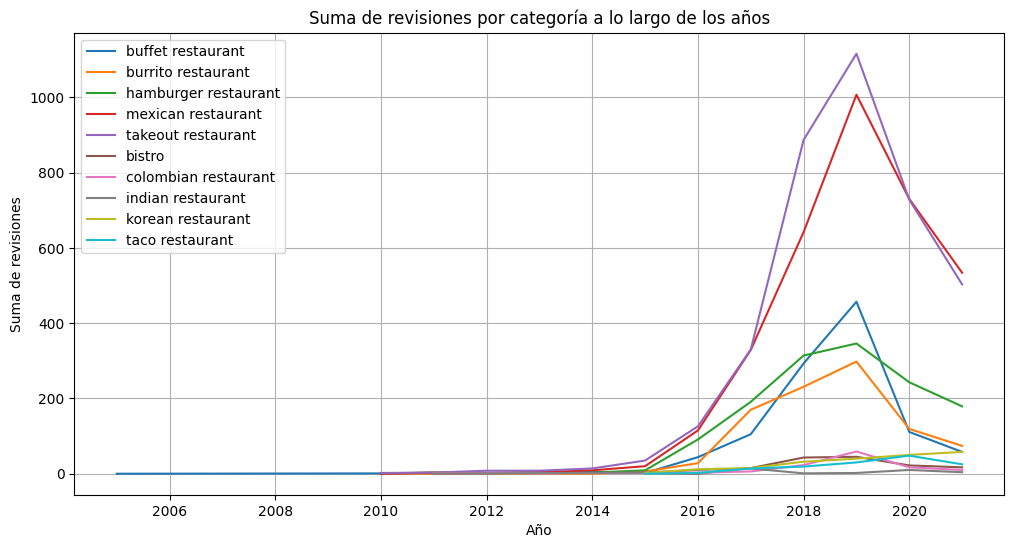

In [141]:
merged_reviews['gastronomy_category'] = merged_reviews['gastronomy_category'].str.lower()
grouped_data = merged_reviews.groupby(['year', 'gastronomy_category'])['text'].count().reset_index()

# Crear un gráfico de líneas para cada categoría
categories = grouped_data['gastronomy_category'].unique()

plt.figure(figsize=(12, 6))

for category in categories:
    category_data = grouped_data[grouped_data['gastronomy_category'] == category]
    plt.plot(category_data['year'], category_data['text'], label=category)

plt.xlabel('Año')
plt.ylabel('Suma de revisiones')
plt.title('Suma de revisiones por categoría a lo largo de los años')
plt.legend()
plt.grid(True)
plt.show()

In [139]:
merged_reviews['gastronomy_category'] = merged_reviews['gastronomy_category'].str.lower()
grouped_data = merged_reviews.groupby(['gastronomy_category', 'year'])['text'].count().reset_index()

grouped_2021 = grouped_data[grouped_data['year'] == 2021]

top_categories_2021 = grouped_2021.sort_values('text', ascending=False)

top_6 = top_categories_2021.head(6)
categories_to_plot = top_6['gastronomy_category'].tolist()
filtered_data = merged_reviews[merged_reviews['gastronomy_category'].isin(categories_to_plot)]

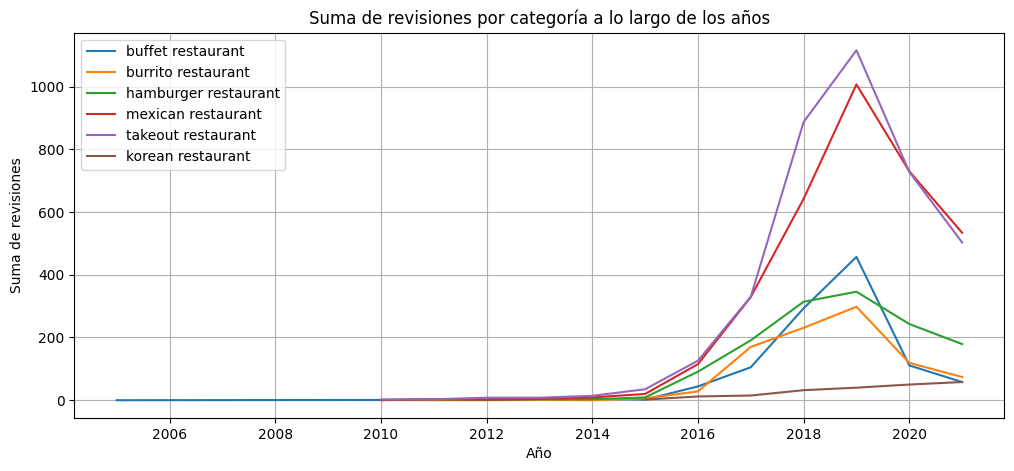

In [142]:
grouped_data = filtered_data.groupby(['year', 'gastronomy_category'])['text'].count().reset_index()

# Crear un gráfico de líneas para cada categoría
categories = grouped_data['gastronomy_category'].unique()

plt.figure(figsize=(12, 5))

for category in categories:
    category_data = grouped_data[grouped_data['gastronomy_category'] == category]
    plt.plot(category_data['year'], category_data['text'], label=category)

plt.xlabel('Año')
plt.ylabel('Suma de revisiones')
plt.title('Suma de revisiones por categoría a lo largo de los años')
plt.legend()
plt.grid(True)
plt.show()

In [134]:
categories

array(['Buffet restaurant', 'Burrito restaurant', 'Hamburger restaurant',
       'Mexican restaurant', 'Takeout Restaurant', 'Korean restaurant',
       'Takeout restaurant'], dtype=object)

## Distribution of the stores

In [52]:
data_gastronomy_n.columns

Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url'],
      dtype='object')

In [53]:
data_gastronomy_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 22325 to 1924868
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              533 non-null    object 
 1   address           533 non-null    object 
 2   gmap_id           533 non-null    object 
 3   description       206 non-null    object 
 4   latitude          533 non-null    float64
 5   longitude         533 non-null    float64
 6   category          533 non-null    object 
 7   avg_rating        533 non-null    float64
 8   num_of_reviews    533 non-null    int64  
 9   price             290 non-null    object 
 10  hours             500 non-null    object 
 11  MISC              528 non-null    object 
 12  state             501 non-null    object 
 13  relative_results  457 non-null    object 
 14  url               533 non-null    object 
dtypes: float64(3), int64(1), object(11)
memory usage: 66.6+ KB


In [54]:
import plotly.express as px

In [55]:
fig = px.scatter_mapbox (data_gastronomy_n, lon = data_gastronomy_n ['longitude'],
                        lat = data_gastronomy_n ['latitude'], text = data_gastronomy_n ['name'], zoom = 5,
                        width = 900, height=600, color = data_gastronomy_n ['avg_rating'], color_continuous_scale=px.colors.sequential.Inferno,
                        template= "seaborn", title = 'Gastronomic Shops in Florida', size=data_gastronomy_n['num_of_reviews'], mapbox_style = 'open-street-map')

#fig.update_layout()
fig.show()

## Context:

**Context**: Nevada is the third most visited state in the United States,  the 7th-most extensive, the 32nd-most populous, and the 9th-least densely populated of the U.S. states.  Las Vegas is one of the most entertaining cities in the state, and other popular tourist destinations include Lake Tahoe, the Hoover Dam, and the Valley of Fire State Park.

According to the latest estimates from the Census Bureau, the population of Nevada is 2,890,845.

It covers a vast area of 110,567 square miles.

Nevada currently has one of the strongest growth rates in the country, reflecting a 7.05% population between 2010 and 2015, which ranks 6th in the nation.

A relatively small percentage of Nevada's population lives in rural areas, such as Ely, West Wendover and Tonopah. The culture of rural Nevada is vastly different than the metropolitan areas, as most people in rural counties are native to the state, whereas Reno and Las Vegas are dominated by populations from other states, especially California. Rural populations are also less diverse, both racially and ethnically.

The largest metropolitan areas, and where the majority of the population is concentrated, includes Las Vegas, in Clark County and Reno in Washoe County.

The most populated city in Nevada is Las Vegas, and the most populated county is Clark County with over 2 million residents.

**Tourism**: In 2022, 38.8 million people visited Las Vegas, a 20.5% increase from the 32.2 million visitors in 2021. Las Vegas ranks fifth worldwide in terms of tourism-related award worldwide, and first in the US.

## Analysis:

-------------------------------------------------------------------------------
**Analysis**: We can see how the gastronomic establishments are mostly grouped in four locations, Las Vegas, Carson City, Reno and Sparks. We can focus on these locations and the busy/main roads to reach them.

It may be because the rest of the state is very sparsely populated and are more rural areas. On the other hand, tourists have a big impact on these results.

## Customer Retention:

In [56]:
gastronomy = data_gastronomy['gmap_id'].to_list()
reviews_g = reviews[reviews['gmap_id'].isin(gastronomy)]

In [57]:
grouped = reviews_g.groupby(['user_id', 'gmap_id'])

retention = grouped['year'].value_counts().reset_index(name='count')

# Agrupa por gmap_id y calcula el promedio
#retention = retention.groupby('gmap_id')['retention_rate'].mean().reset_index()
retention[retention['count']>1]

,user_id,gmap_id,year,count
9,1.000100e+20,0x80c8c557d9d30c57:0xf0f2852208ec1090,2020,2
306,1.002767e+20,0x80c8dc9a7e38eb87:0xb3e4480b7e9da9a,2017,2
311,1.002817e+20,0x80993e958678b5cb:0x59b92f6226a83de3,2018,2
333,1.002975e+20,0x80c8c48920d04a97:0x7d39e873c46ae5b3,2019,2
421,1.003974e+20,0x80c8c7b14bcd6237:0x1f2a705f1b4e5132,2019,2
...,...,...,...,...
26132,1.183123e+20,0x80c8cf279bb04a05:0x17afc20806318354,2020,2
26134,1.183136e+20,0x80c8c48920d04a97:0x7d39e873c46ae5b3,2018,2
26144,1.183206e+20,0x8099469616eeac55:0x89fdd5a57056e16f,2019,2
26159,1.183292e+20,0x80c8cf869559531f:0x22e8a158a2ccc7e0,2019,2


In [58]:
grouped = reviews_g.groupby(['user_id', 'gmap_id'])

# Cuenta total de reviews por usuario y lugar
retention = grouped.size().reset_index(name='total')

# Filtra donde total > 1 (más de 1 review)
retained = retention[retention['total'] > 1]

# Suma de usuarios retenidos por lugar
retained = retained.groupby('gmap_id')['user_id'].count().reset_index(name='retained_users')

print(retained)

                                   gmap_id  retained_users
0    0x80988725aa05d4ab:0x6be6ecdb1ef42ea9               1
1    0x8098e9a4c6dd070d:0xfa94ec2fc16d5484               1
2    0x8098eb8e0b79edc5:0xe24199257efeabcd               1
3    0x809906a39110b511:0xe97547e4fd7f3f37               2
4    0x8099079b79ce23b9:0x50a2fde9edb24e29               2
..                                     ...             ...
121  0x80c8e9a57f6cb9f7:0x48ae7cb299f5c684               6
122  0x80c8eb98f91b743f:0x4c19fd181294a50d               2
123  0x80c8eb9e503be86f:0xda0e789d577ba28b               2
124  0x80c92b34179612e5:0xfc34df105810558b               2
125  0x80ce43f5048e0681:0x9e87eaea0de8a3c5               1

[126 rows x 2 columns]


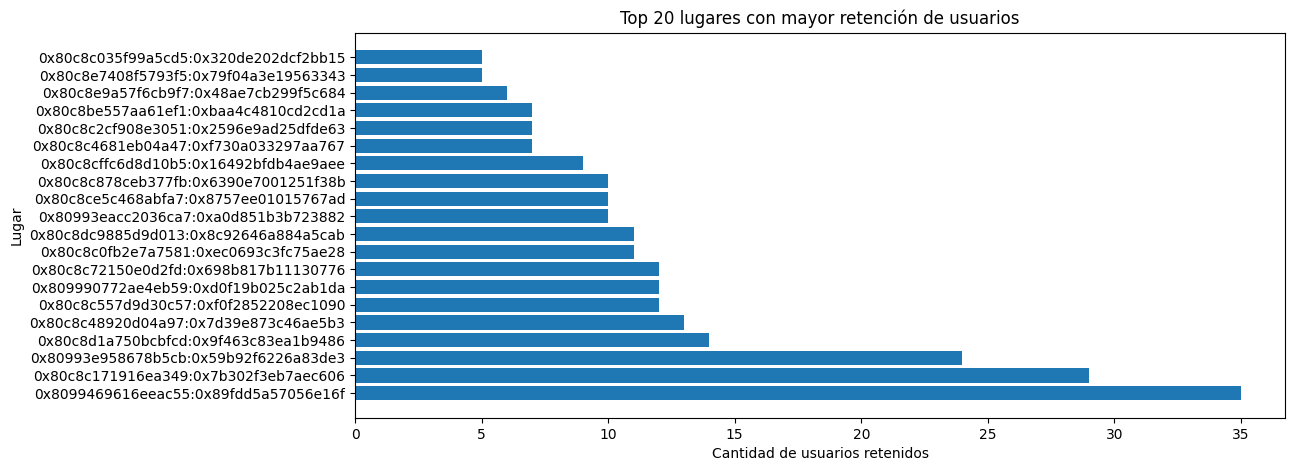

In [59]:
top20 = retained.sort_values('retained_users', ascending=False).head(20)
plt.figure(figsize=(12,5))
plt.barh(top20['gmap_id'], top20['retained_users'])
plt.xlabel('Cantidad de usuarios retenidos')
plt.ylabel('Lugar')
plt.title('Top 20 lugares con mayor retención de usuarios')
plt.show()


In [60]:
df_retained = data_gastronomy_n.merge(top20, on='gmap_id')

In [61]:
columns = ['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
           'category', 'avg_rating', 'num_of_reviews', 'price', 'hours',
           'MISC', 'state', 'relative_results', 'retained_users']
df_retained= df_retained[columns].sort_values('retained_users', ascending=False).reset_index()

In [62]:
import matplotlib.cm as cm
cmap = cm. ScalarMappable(cmap='Blues')
colors = cmap.to_rgba(df_retained['avg_rating'])

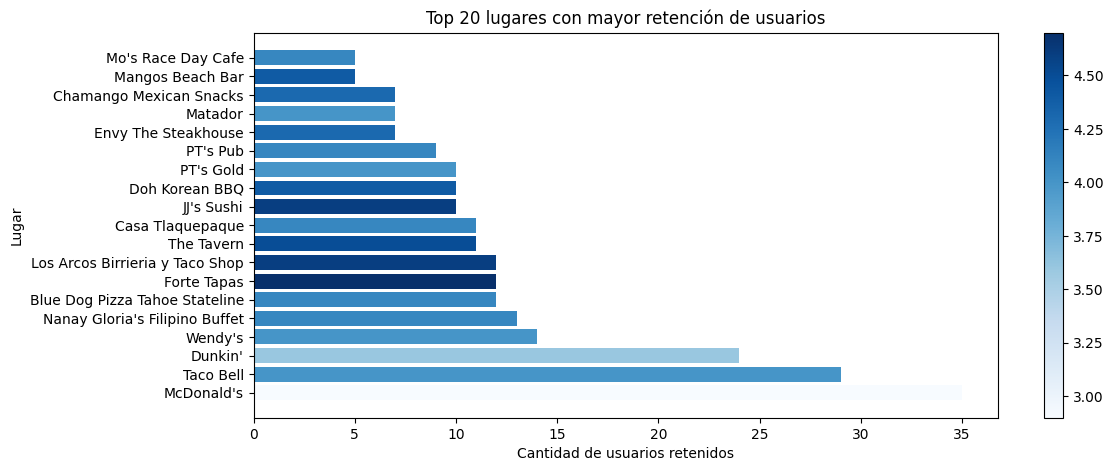

In [63]:
plt.figure(figsize=(12,5))
plt.barh(df_retained['name'], df_retained['retained_users'], color=colors)
plt.xlabel('Cantidad de usuarios retenidos')
plt.ylabel('Lugar')
plt.title('Top 20 lugares con mayor retención de usuarios')

cmap.set_array(df_retained['avg_rating'])
plt.colorbar(cmap)

plt.show()


Load Yelp Datasets:

In [64]:
#import pickle

#with open('/content/drive/MyDrive/YELP & GOOGLE MAPS - REVIEWS AND RECOMMENDATIONS/Yelp/business.pkl', 'rb') as file:
#    data = pickle.load(file)

#business_yelp = pd.DataFrame(data)